In [1]:
import pandas as pd
import numpy as np

In [2]:
# mpra: data loading
mpra = pd.read_csv('../data/220518MPRA.csv')
mpra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5255 entries, 0 to 5254
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   oligo_id               5255 non-null   object 
 1   vars                   5255 non-null   object 
 2   oligo_id2              5255 non-null   object 
 3   rsid                   5255 non-null   object 
 4   snp_type               5255 non-null   object 
 5   snp_type2              5255 non-null   object 
 6   oligo_group            5255 non-null   object 
 7   seq                    5255 non-null   object 
 8   seq2                   5255 non-null   object 
 9   rna_1_var1             5255 non-null   int64  
 10  rna_2_var1             5255 non-null   int64  
 11  rna_3_var1             5255 non-null   int64  
 12  dna_1_var1             5255 non-null   int64  
 13  dna_2_var1             5255 non-null   int64  
 14  dna_3_var1             5255 non-null   int64  
 15  rna_

In [3]:
# mpra_filtered: Remove null p-values, Sort by abslfc
mpra = pd.read_csv('../data/220518MPRA.csv')
mpra_filtered = pd.DataFrame()
mpra_filtered['seq1'] = mpra['seq']
mpra_filtered['seq2'] = mpra['seq2']
mpra_filtered['lfc'] = mpra['log2FoldChange_allele']
mpra_filtered['abslfc'] = mpra_filtered['lfc'].abs()
mpra_filtered['metadata'] = mpra['vars']
mpra_filtered['rsid'] = mpra['rsid']
mpra_filtered['region'] = mpra['oligo_group']
mpra_filtered['pval'] = mpra['padj_allele']
mpra_filtered.dropna(axis = 0, how='any', inplace=True)
mpra_filtered.sort_values('abslfc', ascending=False, inplace=True)
print(mpra_filtered.info())
mpra_filtered.head(20)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2504 entries, 78 to 3663
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   seq1      2504 non-null   object 
 1   seq2      2504 non-null   object 
 2   lfc       2504 non-null   float64
 3   abslfc    2504 non-null   float64
 4   metadata  2504 non-null   object 
 5   rsid      2504 non-null   object 
 6   region    2504 non-null   object 
 7   pval      2504 non-null   float64
dtypes: float64(3), object(5)
memory usage: 176.1+ KB
None


,seq1,seq2,lfc,abslfc,metadata,rsid,region,pval
78,AGGACCGGATCAACTACCAAGCACAAACATTCTGGTTGCATCTCCA...,AGGACCGGATCAACTACCAAGCACAAACATTCTGGTTGCATCTCCA...,-0.526581,0.526581,1012_rs4609899_ref_nonpeak1_A.1012_rs4609899_v...,rs4609899,nonpeak1,1.540000e-35
1353,AGGACCGGATCAACTACTACACAGCAGATACACACACACAGAGACA...,AGGACCGGATCAACTACTACACAGCAGATACACACACACAGAGACA...,0.392813,0.392813,175_rs3740688_ref_nonpeak2_A.175_rs3740688_var...,rs3740688,nonpeak2,7.650738e-01
1573,AGGACCGGATCAACTTCAGTCTCTCTGAGAATAGTTTGTGAGAGAT...,AGGACCGGATCAACTTCAGTCTCTCTGAGAATAGTTTGTGAGAGAT...,-0.350825,0.350825,223_rs13025717_ref_optWin_A.223_rs13025717_var...,rs13025717,optWin,2.700000e-12
1265,AGGACCGGATCAACTAAGGCCCACCTGGGCTGGATTGCCCTGGACG...,AGGACCGGATCAACTAAGGCCCACCTGGGCTGGATTGCCCTGGACG...,-0.341562,0.341562,158_rs28469095_ref_nonpeak1_A.158_rs28469095_v...,rs28469095,nonpeak1,2.268405e-01
1574,AGGACCGGATCAACTGAGAGATTTGTCCTCACAGCTGCAGGACAGC...,AGGACCGGATCAACTGAGAGATTTGTCCTCACAGCTGCAGGACAGC...,-0.330322,0.330322,223_rs13025717_ref_stdWin_A.223_rs13025717_var...,rs13025717,stdWin,8.160000e-16
1148,AGGACCGGATCAACTTGTTGAAACAGTGAGTCAGCTATAAACAAAC...,AGGACCGGATCAACTTGTTGAAACAGTGAGTCAGCTATAAACAAAC...,-0.307084,0.307084,134_rs9912530_ref_nonpeak1_A.134_rs9912530_var...,rs9912530,nonpeak1,8.679512e-01
837,AGGACCGGATCAACTCTGTTTCCCTCTCCATCCCTGCAGGGCTGGG...,AGGACCGGATCAACTCTGTTTCCCTCTCCATCCCTGCAGGGCTGGG...,-0.303891,0.303891,1179_rs187067960_ref_nonpeak2_A.1179_rs1870679...,rs187067960,nonpeak2,9.544583e-01
4699,AGGACCGGATCAACTCTGCACCCAGCCCTGACTAACTTTTTTTTGA...,AGGACCGGATCAACTCTGCACCCAGCCCTGACTAACTTTTTTTTGA...,-0.296089,0.296089,879_rs62061800_ref_nonpeak1_A.879_rs62061800_v...,rs62061800,nonpeak1,3.370000e-16
1149,AGGACCGGATCAACTCTTAAAGCACAGAAATGTCTTCCCTTGAGAT...,AGGACCGGATCAACTCTTAAAGCACAGAAATGTCTTCCCTTGAGAT...,0.293896,0.293896,135_rs11614702_ref_optWin_A.135_rs11614702_var...,rs11614702,optWin,1.060000e-15
2474,AGGACCGGATCAACTATAAATGTGACCAAATTTATTTAGAAGCCAG...,AGGACCGGATCAACTATAAATGTGACCAAATTTATTTAGAAGCCAG...,-0.279620,0.279620,407_rs199523_ref_stdWin_A.407_rs199523_var_std...,rs199523,stdWin,7.004540e-01


In [4]:
# limit to standard or optimal windows
regions = ("stdWin", "optWin")
mpra_peaks = mpra_filtered[mpra_filtered['region'].isin(regions)]
mpra_peaks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 986 entries, 1573 to 2000
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   seq1      986 non-null    object 
 1   seq2      986 non-null    object 
 2   lfc       986 non-null    float64
 3   abslfc    986 non-null    float64
 4   metadata  986 non-null    object 
 5   rsid      986 non-null    object 
 6   region    986 non-null    object 
 7   pval      986 non-null    float64
dtypes: float64(3), object(5)
memory usage: 69.3+ KB


In [5]:
mpra_peaks.head(20)

,seq1,seq2,lfc,abslfc,metadata,rsid,region,pval
1573,AGGACCGGATCAACTTCAGTCTCTCTGAGAATAGTTTGTGAGAGAT...,AGGACCGGATCAACTTCAGTCTCTCTGAGAATAGTTTGTGAGAGAT...,-0.350825,0.350825,223_rs13025717_ref_optWin_A.223_rs13025717_var...,rs13025717,optWin,2.700000e-12
1574,AGGACCGGATCAACTGAGAGATTTGTCCTCACAGCTGCAGGACAGC...,AGGACCGGATCAACTGAGAGATTTGTCCTCACAGCTGCAGGACAGC...,-0.330322,0.330322,223_rs13025717_ref_stdWin_A.223_rs13025717_var...,rs13025717,stdWin,8.160000e-16
1149,AGGACCGGATCAACTCTTAAAGCACAGAAATGTCTTCCCTTGAGAT...,AGGACCGGATCAACTCTTAAAGCACAGAAATGTCTTCCCTTGAGAT...,0.293896,0.293896,135_rs11614702_ref_optWin_A.135_rs11614702_var...,rs11614702,optWin,1.060000e-15
2474,AGGACCGGATCAACTATAAATGTGACCAAATTTATTTAGAAGCCAG...,AGGACCGGATCAACTATAAATGTGACCAAATTTATTTAGAAGCCAG...,-0.279620,0.279620,407_rs199523_ref_stdWin_A.407_rs199523_var_std...,rs199523,stdWin,7.004540e-01
323,AGGACCGGATCAACTTCTCGGGGCGGATTTCTTTCTCAGCGCTCGG...,AGGACCGGATCAACTTCTCGGGGCGGATTTCTTTCTCAGCGCTCGG...,-0.268323,0.268323,1066_rs74548327_ref_stdWin_A.1066_rs74548327_v...,rs74548327,stdWin,4.973799e-01
4297,AGGACCGGATCAACTGTGGTTGCCGGGTCTCCATGGAGAAGCGGCT...,AGGACCGGATCAACTGTGGTTGCCGGGTCTCCATGGAGAAGCGGCT...,0.252296,0.252296,791_rs6085343_ref_optWin_A.791_rs6085343_var_o...,rs6085343,optWin,9.271696e-01
3504,AGGACCGGATCAACTGGACTCAGGACGTCCCTCACCTCCGGCCGCA...,AGGACCGGATCAACTGGACTCAGGACGTCCCTCACCTCCGGCCGCA...,0.247044,0.247044,622_rs3821341_ref_optWin_A.622_rs3821341_var_o...,rs3821341,optWin,9.330418e-01
3133,AGGACCGGATCAACTCTCAATTTCCCAGAATCCCTTGCAGCAATGG...,AGGACCGGATCAACTCTCAATTTCCCAGAATCCCTTGCAGCAATGG...,-0.235525,0.235525,545_rs344791_ref_optWin_A.545_rs344791_var_opt...,rs344791,optWin,1.130000e-10
116,AGGACCGGATCAACTGGCCCACGCCAGCAGGAGCACACCCTGCATC...,AGGACCGGATCAACTGGCCCACGCCAGCAGGAGCACACCCTGCATC...,-0.235140,0.235140,1021_rs7248421_ref_optWin_A.1021_rs7248421_var...,rs7248421,optWin,7.849888e-01
1976,AGGACCGGATCAACTTTTATGAAGTAGTCCAGAACTCTAGCAAGAC...,AGGACCGGATCAACTTTTATGAAGTAGTCCAGAACTCTAGCAAGAC...,-0.225910,0.225910,305_rs1532276_ref_stdWin_A.305_rs1532276_var_s...,rs1532276,stdWin,9.934477e-01


In [6]:
# Running with MPRA Plasmid Sequence
PLASMID_ORIG_U = "agaatgaacaagaattattggaattagataaatgggcaagtttgtggaattggtttaacataacaaattggctgtggtatataaaattattcataatgatagtaggaggcttggtaggtttaagaatagtttttgctgtactttctatagtgaatagagttaggcagggatattcaccattatcgtttcagacccacctcccaaccccgaggggacccgacaggcccgaaggaatagaagaagaaggtggagagagagacagagacagatccattcgattagtgaacggatcggcactgcgtgcgccaattctgcagacaaatggcagtattcatccacaattttaaaagaaaaggggggattggggggtacagtgcaggggaaagaatagtagacataatagcaacagacatacaaactaaagaattacaaaaacaaattacaaaaattcaaaattttcgggtttattacagggacagcagagatccagtttggttagtaccgggcccggtgctttgctctgagccagcccaccagtttggaatgactcctttttatgacttgaattttcaagtataaagtctagtgctaaatttaatttgaacaactgtatagtttttgctggttgggggaaggaaaaaaaatggtggcagtgtttttttcagaattagaagtgaaatgaaaacttgttgtgtgtgaggatttctaatgacatgtggtggttgcatactgagtgaagccggtgagcattctgccatgtcaccccctcgtgctcagtaatgtactttacagaaatcctaaactcaaaagattgatataaaccatgcttcttgtgtatatccggtctcttctctgggtagtctcactcagcctgcatttctgccagggcccgctctagacctgcagg"
PLASMID_UPSTREAM = PLASMID_ORIG_U.upper()

PLASMID_ORIG_D = "CACTAGAGGGTATATAATGGAAGCTCGACTTCCAGCTTGGCAATCCGGTACTGTGCAAAGTGAACACATCGCTAAGCGAAAGCTAAGNNNNNNNNNNNNNNNAccggtcgccaccatggtgagcaagggcgaggagctgttcaccggggtggtgcccatcctggtcgagctggacggcgacgtaaacggccacaagttcagcgtgtccggcgagggcgagggcgatgccacctacggcaagctgaccctgaagttcatctgcaccaccggcaagctgcccgtgccctggcccaccctcgtgaccaccctgacctacggcgtgcagtgcttcagccgctaccccgaccacatgaagcagcacgacttcttcaagtccgccatgcccgaaggctacgtccaggagcgcaccatcttcttcaaggacgacggcaactacaagacccgcgccgaggtgaagttcgagggcgacaccctggtgaaccgcatcgagctgaagggcatcgacttcaaggaggacggcaacatcctggggcacaagctggagtacaactacaacagccacaacgtctatatcatggccgacaagcagaagaacggcatcaaggtgaacttcaagatccgccacaacatcgaggacggcagcgtgcagctcgccgaccactaccagcagaacacccccatcggcgacggccccgtgctgctgcccgacaaccactacctgagcacccagtccgccctgagcaaagaccccaacgagaagcgcgatcacatggtcctgctggagttcgtgaccgccgccgggatcactctcggcatggacgagctgtacaagtaggaattcgtcgagggacctaataacttcgtatagcatacattatacgaagttatacatgtttaagggttccgg"
PLASMID_DOWNSTREAM = PLASMID_ORIG_D.upper()

In [7]:
# Make appropriate lists
metadata = mpra_peaks['metadata']
seqA_oligos = mpra_peaks['seq1']
seqB_oligos = mpra_peaks['seq2']
pvals = mpra_peaks['pval']

In [8]:
seqA = PLASMID_UPSTREAM + seqA_oligos + PLASMID_DOWNSTREAM
seqB = PLASMID_UPSTREAM + seqB_oligos + PLASMID_DOWNSTREAM

In [9]:
seqA = seqA.reset_index(drop=True)
seqB = seqB.reset_index(drop=True)
metadata = metadata.reset_index(drop=True)
pvals = pvals.reset_index(drop=True)

In [10]:
print(seqA.head())
print(seqB.head())
print(metadata.head())
print(pvals.head())

0    AGAATGAACAAGAATTATTGGAATTAGATAAATGGGCAAGTTTGTG...
1    AGAATGAACAAGAATTATTGGAATTAGATAAATGGGCAAGTTTGTG...
2    AGAATGAACAAGAATTATTGGAATTAGATAAATGGGCAAGTTTGTG...
3    AGAATGAACAAGAATTATTGGAATTAGATAAATGGGCAAGTTTGTG...
4    AGAATGAACAAGAATTATTGGAATTAGATAAATGGGCAAGTTTGTG...
Name: seq1, dtype: object
0    AGAATGAACAAGAATTATTGGAATTAGATAAATGGGCAAGTTTGTG...
1    AGAATGAACAAGAATTATTGGAATTAGATAAATGGGCAAGTTTGTG...
2    AGAATGAACAAGAATTATTGGAATTAGATAAATGGGCAAGTTTGTG...
3    AGAATGAACAAGAATTATTGGAATTAGATAAATGGGCAAGTTTGTG...
4    AGAATGAACAAGAATTATTGGAATTAGATAAATGGGCAAGTTTGTG...
Name: seq2, dtype: object
0    223_rs13025717_ref_optWin_A.223_rs13025717_var...
1    223_rs13025717_ref_stdWin_A.223_rs13025717_var...
2    135_rs11614702_ref_optWin_A.135_rs11614702_var...
3    407_rs199523_ref_stdWin_A.407_rs199523_var_std...
4    1066_rs74548327_ref_stdWin_A.1066_rs74548327_v...
Name: metadata, dtype: object
0    2.700000e-12
1    8.160000e-16
2    1.060000e-15
3    7.004540e-01
4    4.973799e-01
Nam

In [36]:
os.chdir('/home/ubuntu/variantapp')
sys.path.append("/home/ubuntu/variantapp/scoring")

In [37]:
from scoringV2 import gen_MPRA_preds

In [38]:
C24preds = gen_MPRA_preds('C24', seqA, seqB, metadata)

model: C24


/home/ubuntu/.local/lib/python3.8/site-packages/tensorflow/python/keras/layers/core.py:1057: UserWarning: archs is not loaded, but a Lambda layer uses it. It may cause errors.
  warnings.warn('{} is not loaded, but a Lambda layer uses it. '


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 2114, 4)]    0                                            
__________________________________________________________________________________________________
model (Functional)              [(None, 1000), (None 6377986     input_1[0][0]                    
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 1)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 1000)]       0                                            
____________________________________________________________________________________________

/home/ubuntu/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Done predsA Local time: Tue Jun 28 23:56:27 2022
Done predsB Local time: Tue Jun 28 23:58:16 2022


In [44]:
C24preds.head(20)

,lfc,abs_lfc,A_scores,B_scores,max_alleles,jsd,metadata,NN_cluster
0,-0.276793,0.276793,294.733130,223.470093,294.733130,0.049879,223_rs13025717_ref_optWin_A.223_rs13025717_var...,C24
1,-0.291354,0.291354,278.164563,207.858728,278.164563,0.046841,223_rs13025717_ref_stdWin_A.223_rs13025717_var...,C24
2,0.831865,0.831865,90.417373,207.742839,207.742839,0.095041,135_rs11614702_ref_optWin_A.135_rs11614702_var...,C24
3,-0.110258,0.110258,140.284608,125.639360,140.284608,0.019163,407_rs199523_ref_stdWin_A.407_rs199523_var_std...,C24
4,-0.011881,0.011881,88.128272,87.087412,88.128272,0.012505,1066_rs74548327_ref_stdWin_A.1066_rs74548327_v...,C24
5,0.004130,0.004130,43.071689,43.249947,43.249947,0.010552,791_rs6085343_ref_optWin_A.791_rs6085343_var_o...,C24
6,0.011977,0.011977,25.674574,25.983933,25.983933,0.009257,622_rs3821341_ref_optWin_A.622_rs3821341_var_o...,C24
7,-0.762528,0.762528,135.018422,62.984129,135.018422,0.100561,545_rs344791_ref_optWin_A.545_rs344791_var_opt...,C24
8,0.151356,0.151356,15.258395,17.751783,17.751783,0.022616,1021_rs7248421_ref_optWin_A.1021_rs7248421_var...,C24
9,0.307006,0.307006,41.326193,56.176730,56.176730,0.024970,305_rs1532276_ref_stdWin_A.305_rs1532276_var_s...,C24


In [45]:
C24 = C24preds.copy()

In [46]:
C24['pvals'] = pvals

In [47]:
C24.head()

,lfc,abs_lfc,A_scores,B_scores,max_alleles,jsd,metadata,NN_cluster,pvals
0,-0.276793,0.276793,294.733130,223.470093,294.733130,0.049879,223_rs13025717_ref_optWin_A.223_rs13025717_var...,C24,2.700000e-12
1,-0.291354,0.291354,278.164563,207.858728,278.164563,0.046841,223_rs13025717_ref_stdWin_A.223_rs13025717_var...,C24,8.160000e-16
2,0.831865,0.831865,90.417373,207.742839,207.742839,0.095041,135_rs11614702_ref_optWin_A.135_rs11614702_var...,C24,1.060000e-15
3,-0.110258,0.110258,140.284608,125.639360,140.284608,0.019163,407_rs199523_ref_stdWin_A.407_rs199523_var_std...,C24,7.004540e-01
4,-0.011881,0.011881,88.128272,87.087412,88.128272,0.012505,1066_rs74548327_ref_stdWin_A.1066_rs74548327_v...,C24,4.973799e-01


In [48]:
C24['MPRA_abslfc'] = mpra_peaks['abslfc'].reset_index(drop=True)
C24.head()

,lfc,abs_lfc,A_scores,B_scores,max_alleles,jsd,metadata,NN_cluster,pvals,MPRA_abslfc
0,-0.276793,0.276793,294.733130,223.470093,294.733130,0.049879,223_rs13025717_ref_optWin_A.223_rs13025717_var...,C24,2.700000e-12,0.350825
1,-0.291354,0.291354,278.164563,207.858728,278.164563,0.046841,223_rs13025717_ref_stdWin_A.223_rs13025717_var...,C24,8.160000e-16,0.330322
2,0.831865,0.831865,90.417373,207.742839,207.742839,0.095041,135_rs11614702_ref_optWin_A.135_rs11614702_var...,C24,1.060000e-15,0.293896
3,-0.110258,0.110258,140.284608,125.639360,140.284608,0.019163,407_rs199523_ref_stdWin_A.407_rs199523_var_std...,C24,7.004540e-01,0.279620
4,-0.011881,0.011881,88.128272,87.087412,88.128272,0.012505,1066_rs74548327_ref_stdWin_A.1066_rs74548327_v...,C24,4.973799e-01,0.268323


In [55]:
C24_filtered = C24[C24['pvals'] < 0.4]

In [56]:
C24_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 46 entries, 0 to 148
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   lfc          46 non-null     float64
 1   abs_lfc      46 non-null     float64
 2   A_scores     46 non-null     float64
 3   B_scores     46 non-null     float64
 4   max_alleles  46 non-null     float64
 5   jsd          46 non-null     float64
 6   metadata     46 non-null     object 
 7   NN_cluster   46 non-null     object 
 8   pvals        46 non-null     float64
 9   MPRA_abslfc  46 non-null     float64
dtypes: float64(8), object(2)
memory usage: 4.0+ KB


0.5473448566510929


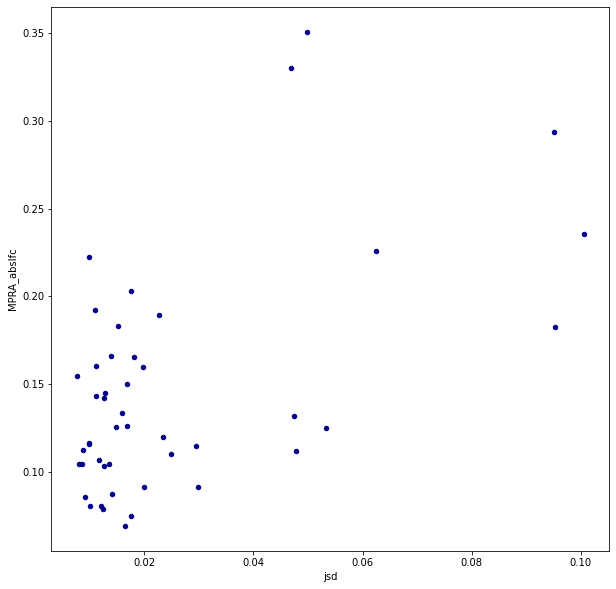

In [57]:
ax1 = C24_filtered.plot.scatter(x='jsd', y='MPRA_abslfc', c='DarkBlue', figsize=(10,10))
print(C24_filtered['jsd'].corr(C24_filtered['MPRA_abslfc']))

In [58]:
C24_filtered['MPRA_delta'] = np.exp(C24_filtered['MPRA_abslfc'])

0.5475072208404655


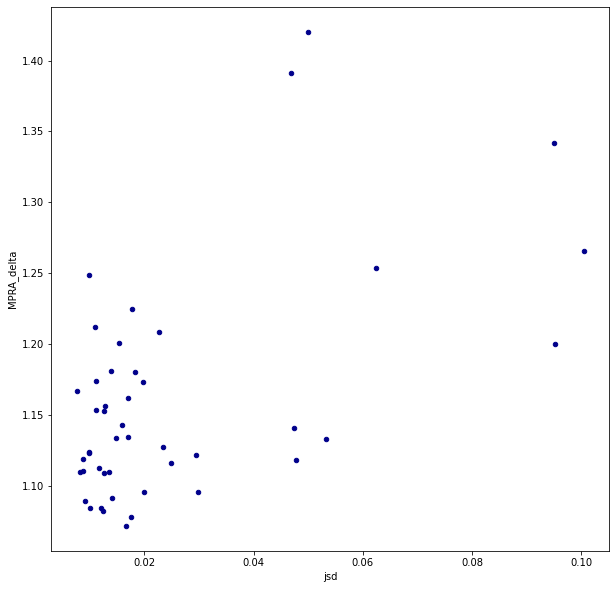

In [59]:
ax1 = C24_filtered.plot.scatter(x='jsd', y='MPRA_delta', c='DarkBlue', figsize=(10,10))
print(C24_filtered['jsd'].corr(C24_filtered['MPRA_delta']))

In [13]:
K562preds = gen_MPRA_preds('K562', seqA, seqB, metadata)

model: K562


2022-06-28 23:38:25.884666: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2022-06-28 23:38:25.884858: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-28 23:38:25.884871: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-28 23:38:25.884889: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ip-172-31-16-139): /proc/driver/nvidia/version does not exist
2022-06-28 23:38:25.885135: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with th

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
sequence (InputLayer)           [(None, 2114, 4)]    0                                            
__________________________________________________________________________________________________
wo_bias_bpnet_1st_conv (Conv1D) (None, 2094, 512)    43520       sequence[0][0]                   
__________________________________________________________________________________________________
wo_bias_bpnet_1conv (Conv1D)    (None, 2090, 512)    786944      wo_bias_bpnet_1st_conv[0][0]     
__________________________________________________________________________________________________
wo_bias_bpnet_1crop (Cropping1D (None, 2090, 512)    0           wo_bias_bpnet_1st_conv[0][0]     
____________________________________________________________________________________________

/home/ubuntu/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


Done predsA Local time: Tue Jun 28 23:40:09 2022
Done predsB Local time: Tue Jun 28 23:41:52 2022


In [14]:
K562 = K562preds.copy()

In [15]:
K562['pvals'] = pvals

In [16]:
K562['MPRA_abslfc'] = mpra_peaks['abslfc'].reset_index(drop=True)
K562.head()

,lfc,abs_lfc,A_scores,B_scores,max_alleles,jsd,metadata,NN_cluster,pvals,MPRA_abslfc
0,-0.253351,0.253351,158.567592,123.079478,158.567592,0.049507,223_rs13025717_ref_optWin_A.223_rs13025717_var...,K562,2.700000e-12,0.350825
1,-0.156016,0.156016,140.285443,120.020581,140.285443,0.037324,223_rs13025717_ref_stdWin_A.223_rs13025717_var...,K562,8.160000e-16,0.330322
2,0.835363,0.835363,152.100410,350.690451,350.690451,0.093208,135_rs11614702_ref_optWin_A.135_rs11614702_var...,K562,1.060000e-15,0.293896
3,-0.437545,0.437545,804.001070,519.078948,804.001070,0.104112,407_rs199523_ref_stdWin_A.407_rs199523_var_std...,K562,7.004540e-01,0.279620
4,-0.328762,0.328762,709.084441,510.409166,709.084441,0.029589,1066_rs74548327_ref_stdWin_A.1066_rs74548327_v...,K562,4.973799e-01,0.268323


In [25]:
K562_filtered = K562[K562['pvals'] < 0.5]
K562_filtered['MPRA_delta'] = np.exp(K562_filtered['MPRA_abslfc'])

/home/ubuntu/.local/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [26]:
K562_filtered.head()

,lfc,abs_lfc,A_scores,B_scores,max_alleles,jsd,metadata,NN_cluster,pvals,MPRA_abslfc,MPRA_delta
0,-0.253351,0.253351,158.567592,123.079478,158.567592,0.049507,223_rs13025717_ref_optWin_A.223_rs13025717_var...,K562,2.700000e-12,0.350825,1.420239
1,-0.156016,0.156016,140.285443,120.020581,140.285443,0.037324,223_rs13025717_ref_stdWin_A.223_rs13025717_var...,K562,8.160000e-16,0.330322,1.391415
2,0.835363,0.835363,152.100410,350.690451,350.690451,0.093208,135_rs11614702_ref_optWin_A.135_rs11614702_var...,K562,1.060000e-15,0.293896,1.341644
4,-0.328762,0.328762,709.084441,510.409166,709.084441,0.029589,1066_rs74548327_ref_stdWin_A.1066_rs74548327_v...,K562,4.973799e-01,0.268323,1.307770
7,0.057034,0.057034,649.559077,687.682841,687.682841,0.017114,545_rs344791_ref_optWin_A.545_rs344791_var_opt...,K562,1.130000e-10,0.235525,1.265573


0.37552198102548134


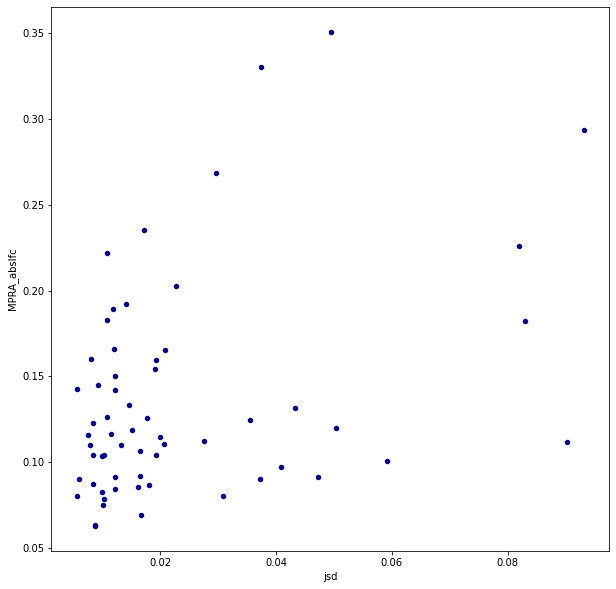

In [35]:
ax2 = K562_filtered.plot.scatter(x='jsd', y='MPRA_abslfc', c='DarkBlue', figsize=(10,10))
print(K562_filtered['jsd'].corr(K562_filtered['MPRA_abslfc']))

0.37867768786560163


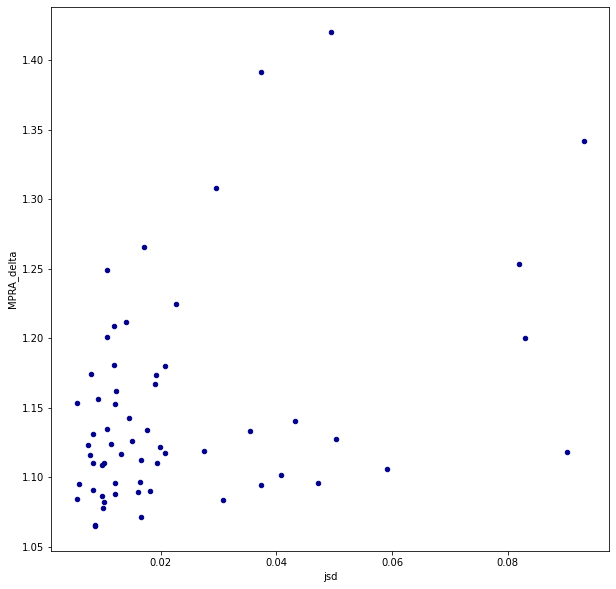

In [40]:
ax2 = K562_filtered.plot.scatter(x='jsd', y='MPRA_delta', c='DarkBlue', figsize=(10,10))
print(K562_filtered['jsd'].corr(K562_filtered['MPRA_delta']))

In [41]:
import seaborn

<AxesSubplot:xlabel='jsd', ylabel='MPRA_delta'>

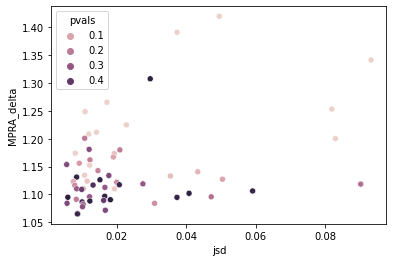

In [43]:
seaborn.scatterplot(x='jsd', y='MPRA_delta', hue='pvals', data=K562_filtered)
# ax2 = K562_filtered.plot.scatter(x='jsd', y='MPRA_delta', c='DarkBlue', figsize=(10,10))
